In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [2]:
train_data = pd.read_parquet('train_data.parquet')

In [3]:
train_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979333,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983,0


In [66]:
train_data.isna().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
target               0
Length: 191, dtype: int64

In [65]:
5531451*191

1056507141

In [62]:
train_data['target'].value_counts()

0    4153582
1    1377869
Name: target, dtype: int64

In [60]:
clients = train_data['customer_ID'].unique()
n = int(0.1*len(clients))
n = 10
selected_clients = np.random.choice(clients, n, replace=False)

In [61]:
train = train_data[train_data.customer_ID.isin(selected_clients)]

customer_ID
62ede97206eb40357ba7d521e80282c5a61dc19137b7de3163cfff0841a9427c    AxesSubplot(0.125,0.125;0.775x0.755)
703278395354e13d89c06f4f61ad2bd8a2c6ffc59281b3687da8a30175ba0b6d    AxesSubplot(0.125,0.125;0.775x0.755)
7b3ea56227270cdfb64ae4f9656ecd756f1b7f2936ea6d95d2bdd2734fca30a5    AxesSubplot(0.125,0.125;0.775x0.755)
9507e929fddf4421b837ce2ab8bf728fe354fab55e8bc9efff014126b2be77d9    AxesSubplot(0.125,0.125;0.775x0.755)
f23a7711d1f075f94e3974a4cfca4762e8086f93d69b0fbff55edc63aa6cb1e3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

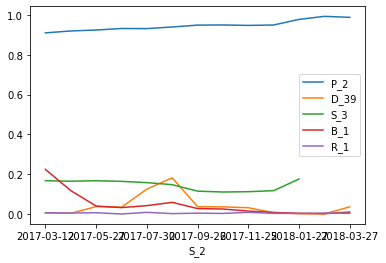

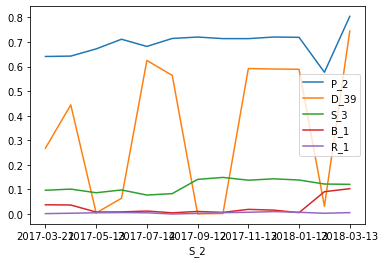

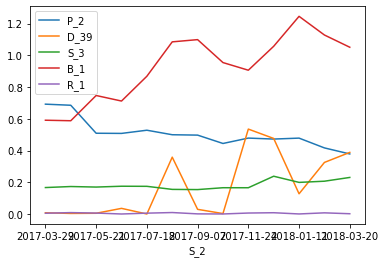

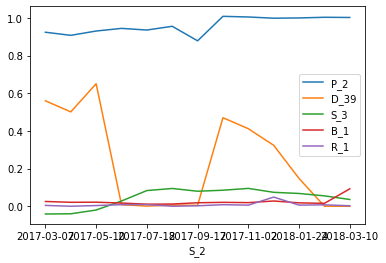

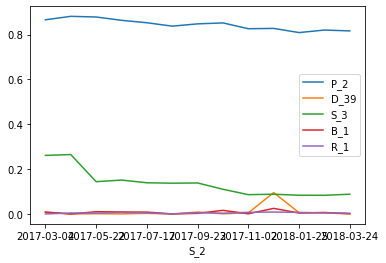

In [59]:
train.groupby('customer_ID').plot(x = 'S_2' , y = ['P_2', 'D_39' , 'S_3', 'B_1', 'R_1'])

<AxesSubplot:xlabel='P_2', ylabel='Count'>

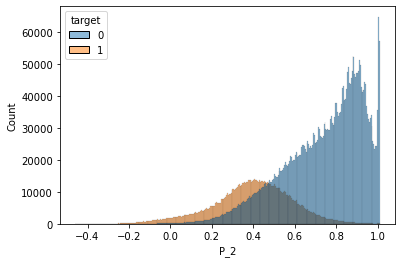

In [39]:
sns.histplot(train_data, x = 'P_2', hue = 'target')

In [63]:
train_data.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

<AxesSubplot:xlabel='S_3', ylabel='Count'>

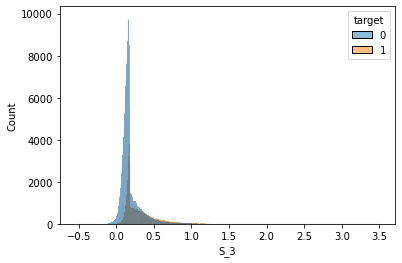

In [54]:
sns.histplot(train, x = 'S_3', hue = 'target')

<AxesSubplot:xlabel='S_3', ylabel='Count'>

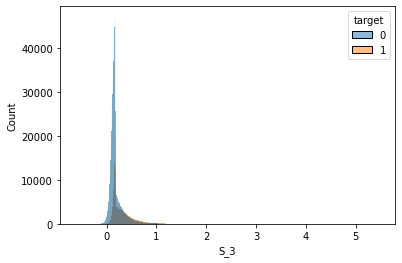

In [44]:
sns.histplot(train_data, x = 'S_3', hue = 'target')

<AxesSubplot:xlabel='B_1', ylabel='Count'>

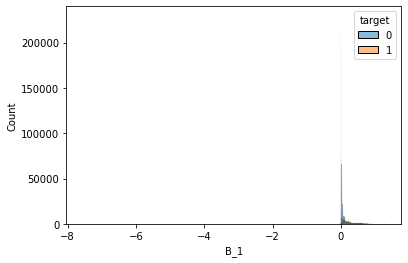

In [45]:
sns.histplot(train_data, x = 'B_1', hue = 'target')

<AxesSubplot:xlabel='R_1', ylabel='Count'>

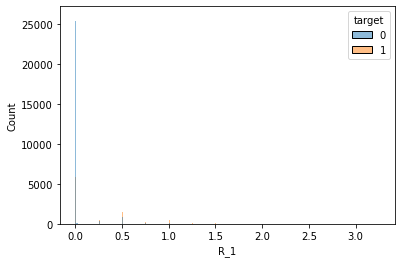

In [46]:
sns.histplot(train_data, x = 'R_1', hue = 'target')

<AxesSubplot:xlabel='D_139', ylabel='Count'>

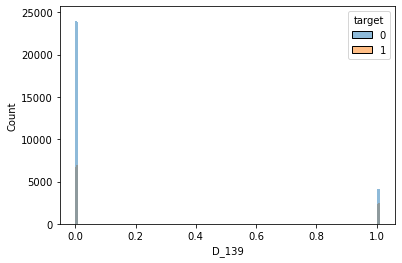

In [43]:
sns.histplot(train_data, x = 'D_139', hue = 'target')